In [52]:
from datascience import *
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [51]:
# Load the data with dataframes
edf_fips_location_data = pd.read_csv("edf_fips_location_data.csv")
final_data = pd.read_csv("EDF_Database_2v3_1.csv")

# Drop NaN values
final_data.dropna(subset=['Place FIPS'], inplace=True)

# Merge the dataframes
final_data = final_data.merge(edf_fips_location_data, left_on='Place FIPS', right_on='Place FIPS', how='left')

# Move columns to the front
cols = list(final_data)
cols = cols[-3:] + cols[:-3]
final_data = final_data[cols]

# Drop column
final_data.drop(columns=["Unincorporated, Non-Place FIPS"], inplace=True)

# Convert to datascience table
ds_final_data = Table.from_df(final_data)

In [24]:
ds_final_data.show(5)

Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 17 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Not Hispanic or Latino:,Hispanic or Latino,Population 25 Years and Over:,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree,Population 25 Years and Over:.1,Less than High School.1,High School Diploma,Bachelor's Degree or Better,Households:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Median Household Income (In 2020 Inflation Adjusted Dollars),Median Household Income Occupied Housing Units:,Owner Occupied,Renter Occupied,Per Capita Income (In 2020 Inflation Adjusted Dollars),Occupied Housing Units:,Owner Occupied.1,Renter Occupied.1,Owner Occupied Housing Units:,"White Alone, Not Hispanic or Latino Homeowners",Non-White Homeowners,Owner-Occupied Housing Units:,"Less than $20,000","$20,000 to $49,999","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $299,999","$300,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 or More",Population Under 18 Years of Age for Whom Poverty Status Is Determined:,Living in Poverty,At or Above Poverty Level,Population Age 18 to 64 for Whom Poverty Status Is Determined:,Living in Poverty.1,At or Above Poverty Level.1,Population Age 65 and Over for Whom Poverty Status Is Determined:,Living in Poverty.2,At or Above Poverty Level.2,Rural Capacity (Headwaters Index),Social Vulnerability (CDC Index),Percent of Land in 500-Year Floodplain,Percent of Land in 100-Year Floodplain,Total Percent of Land at Some Level of Flood Risk
Aberdeen town,125,Moore,3.70016e+06,7862,774.8,10.15,849,723,277,116,434,1116,1279,821,821,706,589,131,6449,1092,73,1,0,89,158,7524,338,5463,306,1271,1917,1380,505,66,18,5463,306,3188,1969,3136,79,147,138,95,217,172,251,77,72,350,542,377,282,130,107,100,58770,58770,62137,35563,28117,3136,2107,1029,2107,1692,415,2107,0,0,153,358,1165,418,13,0,0,1962,100,1862,4462,378,4084,1313,61,1252,74,0.48,0.43,4.22,4.65
Advance CDP,59,Davie,3.70044e+06,1135,158.5,7.16,141,116,87,33,0,139,102,182,183,87,65,0,1105,30,0,0,0,0,0,1135,0,758,80,199,275,175,16,13,0,758,80,474,204,392,0,24,31,0,30,0,0,34,37,0,17,54,62,44,43,16,90461,90461,90691,nan,32419,392,359,33,359,340,19,359,0,13,74,11,139,122,0,0,0,377,75,302,606,80,526,152,13,139,nan,0.18,0.08,10.22,10.3
Ahoskie town,91,Hertford,3.7005e+06,4819,1095,4.4,256,178,312,196,445,739,442,518,764,500,282,187,1270,3089,93,144,4,21,198,4654,165,3432,738,1159,937,407,147,35,9,3432,738,2096,598,1906,261,182,152,126,112,106,77,117,93,180,143,179,86,42,33,17,35972,35972,51875,26494,20640,1906,791,1115,791,301,490,791,20,57,373,161,153,17,1,3,6,940,301,639,2841,623,2218,803,160,643,67,0.86,1.37,10.22,11.59
Alamance village,1,Alamance,3.70064e+06,1280,1609.8,0.8,15,108,152,98,69,81,233,186,152,140,29,17,1166,48,7,4,0,43,12,1237,43,838,31,158,271,252,94,21,11,838,31,429,378,419,0,5,7,9,7,15,10,9,2,22,75,64,35,43,79,37,89688,89688,97083,nan,37828,419,397,22,397,367,30,397,14,2,34,26,82,219,20,0,0,373,0,373,721,4,717,186,6,180,68,0.16,1.44,4.64,6.09
Albemarle city,167,Stanly,3.70068e+06,16073,920.6,17.46,1008,1324,876,449,1350,2335,1450,1664,2102,1869,1061,585,11106,3781,252,159,0,318,457,14902,1171,11066,1715,3280,4172,1398,338,139,24,11066,1715,7452,1899,6258,726,432,416,

In [42]:
print("Number of rows: ", ds_final_data.num_rows)

Number of rows:  776


In [43]:
print("Number of columns: ", ds_final_data.num_columns)

Number of columns:  92


In [53]:
# Descriptive statistics
ds_final_data.describe()

AttributeError: 'Table' object has no attribute 'describe'

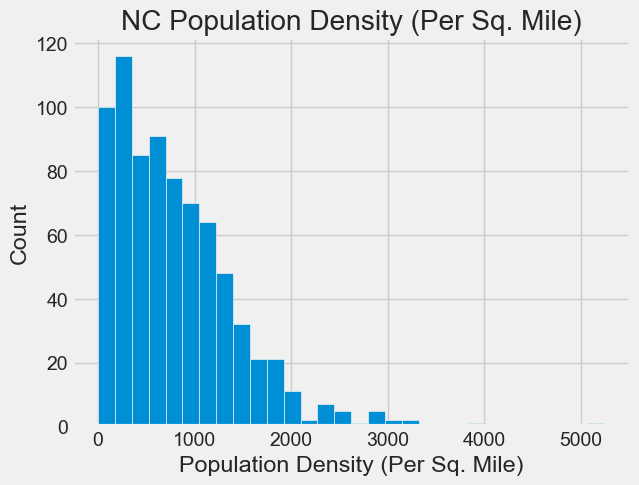

In [33]:
plt.hist(ds_final_data["Population Density (Per Sq. Mile)"], bins="auto")
plt.title("NC Population Density (Per Sq. Mile)")
plt.xlabel("Population Density (Per Sq. Mile)")
plt.ylabel("Count")
plt.show()

In [36]:
ds_final_data.sort("Total Percent of Land at Some Level of Flood Risk", descending=True).show(5)

Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 17 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Not Hispanic or Latino:,Hispanic or Latino,Population 25 Years and Over:,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree,Population 25 Years and Over:.1,Less than High School.1,High School Diploma,Bachelor's Degree or Better,Households:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Median Household Income (In 2020 Inflation Adjusted Dollars),Median Household Income Occupied Housing Units:,Owner Occupied,Renter Occupied,Per Capita Income (In 2020 Inflation Adjusted Dollars),Occupied Housing Units:,Owner Occupied.1,Renter Occupied.1,Owner Occupied Housing Units:,"White Alone, Not Hispanic or Latino Homeowners",Non-White Homeowners,Owner-Occupied Housing Units:,"Less than $20,000","$20,000 to $49,999","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $299,999","$300,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 or More",Population Under 18 Years of Age for Whom Poverty Status Is Determined:,Living in Poverty,At or Above Poverty Level,Population Age 18 to 64 for Whom Poverty Status Is Determined:,Living in Poverty.1,At or Above Poverty Level.1,Population Age 65 and Over for Whom Poverty Status Is Determined:,Living in Poverty.2,At or Above Poverty Level.2,Rural Capacity (Headwaters Index),Social Vulnerability (CDC Index),Percent of Land in 500-Year Floodplain,Percent of Land in 100-Year Floodplain,Total Percent of Land at Some Level of Flood Risk
Alexis CDP,71,Gaston,3.70088e+06,818,414.1,1.98,28,56,11,0,76,74,89,66,30,136,212,40,661,129,0,10,0,0,18,806,12,647,52,223,359,9,0,0,4,647,52,582,13,358,0,28,9,16,4,119,6,12,23,21,58,30,0,32,0,0,36250,36250,34811,nan,23289,358,310,48,310,274,36,310,0,4,44,64,150,48,0,0,0,95,0,95,335,48,287,388,20,368,nan,0.35,nan,nan,nan
Arapahoe town,137,Pamlico,3.70164e+06,397,182.8,2.17,15,19,5,2,44,39,50,73,51,44,42,13,347,33,11,0,2,0,4,386,11,312,43,133,110,15,5,3,3,312,43,243,26,200,11,4,28,7,14,4,6,11,7,5,7,44,19,22,2,9,67500,67500,80625,nan,39908,200,163,37,163,151,12,163,18,11,44,36,35,11,8,0,0,41,6,35,257,22,235,99,7,92,56,0.37,nan,nan,nan
Bailey town,127,Nash,3.70302e+06,492,700.9,0.7,87,7,15,13,31,73,43,54,43,75,41,10,292,80,0,0,0,58,62,410,82,339,49,119,108,57,6,0,0,339,49,227,63,215,2,15,9,12,37,6,32,3,6,14,8,41,22,2,6,0,39018,39018,47083,35250,24650,215,143,72,143,107,36,143,0,14,44,46,26,9,0,4,0,122,72,50,244,48,196,126,8,118,56,0.67,nan,nan,nan
Bear Grass town,117,Martin,3.70418e+06,82,323.4,0.25,17,1,1,3,0,8,18,15,3,10,6,0,77,0,0,0,0,0,5,77,5,60,7,11,35,5,0,0,2,60,7,46,7,33,0,2,0,0,4,1,4,0,10,1,5,3,1,0,2,0,48875,48875,49125,nan,22773,33,27,6,27,27,0,27,2,1,16,1,7,0,0,0,0,22,0,22,44,10,34,16,0,16,53,0.49,nan,nan,nan
Beech Mountain town,"11, 189","Avery, Watauga",3.70451e+06,766,118.2,6.48,10,27,31,18,12,40,69,75,177,191,94,22,734,3,8,9,0,0,12,757,9,668,22,97,250,162,83,30,24,668,22,347,299,350,11,8,9,14,15,10,6,12,23,37,45,42,35,24,25,34,72917,72917,74444,51250,45259,350,318,32,318,311,7,318,0,2,15,20,132,103,29,13,4,86,16,70,373,25,348,307,17,290,nan,0.23,nan,nan,nan


In [38]:
alexis_cdp = ds_final_data.where("Geography Name", "Alexis CDP")
alexis_cdp.show()

Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 17 Years,18 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Not Hispanic or Latino:,Hispanic or Latino,Population 25 Years and Over:,Less than High School,High School Graduate (Includes Equivalency),Some College,Bachelor's Degree,Master's Degree,Professional School Degree,Doctorate Degree,Population 25 Years and Over:.1,Less than High School.1,High School Diploma,Bachelor's Degree or Better,Households:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Median Household Income (In 2020 Inflation Adjusted Dollars),Median Household Income Occupied Housing Units:,Owner Occupied,Renter Occupied,Per Capita Income (In 2020 Inflation Adjusted Dollars),Occupied Housing Units:,Owner Occupied.1,Renter Occupied.1,Owner Occupied Housing Units:,"White Alone, Not Hispanic or Latino Homeowners",Non-White Homeowners,Owner-Occupied Housing Units:,"Less than $20,000","$20,000 to $49,999","$50,000 to $99,999","$100,000 to $149,999","$150,000 to $299,999","$300,000 to $499,999","$500,000 to $749,999","$750,000 to $999,999","$1,000,000 or More",Population Under 18 Years of Age for Whom Poverty Status Is Determined:,Living in Poverty,At or Above Poverty Level,Population Age 18 to 64 for Whom Poverty Status Is Determined:,Living in Poverty.1,At or Above Poverty Level.1,Population Age 65 and Over for Whom Poverty Status Is Determined:,Living in Poverty.2,At or Above Poverty Level.2,Rural Capacity (Headwaters Index),Social Vulnerability (CDC Index),Percent of Land in 500-Year Floodplain,Percent of Land in 100-Year Floodplain,Total Percent of Land at Some Level of Flood Risk
Alexis CDP,71,Gaston,3.70088e+06,818,414.1,1.98,28,56,11,0,76,74,89,66,30,136,212,40,661,129,0,10,0,0,18,806,12,647,52,223,359,9,0,0,4,647,52,582,13,358,0,28,9,16,4,119,6,12,23,21,58,30,0,32,0,0,36250,36250,34811,nan,23289,358,310,48,310,274,36,310,0,4,44,64,150,48,0,0,0,95,0,95,335,48,287,388,20,368,nan,0.35,nan,nan,nan


In [63]:
# Merge Golden Leaf Data
golden_leaf_data = pd.read_csv("golden_leaf_data.csv")
final_data_2 = final_data.merge(golden_leaf_data, left_on='County Name', right_on='County', how='left')

# Drop last 5 columns
final_data_2 = final_data_2.iloc[:, :-7]

# Drop column
final_data_2.drop(columns=["Natural Infrastructure", "Gray Infrastructure", "Hybrid Solution", "Flood Risk Metric(s)"], inplace=True)
final_data_2

final_data_2.to_csv("final_data_with_golden_leaf.csv", index=False)

Below we analyze the correlation between the variables in the dataset.

/var/folders/sb/jbh1d71j5c9clmnb_rnsjqb00000gn/T/ipykernel_3036/1252956636.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_data_2.corr()


<AxesSubplot: >

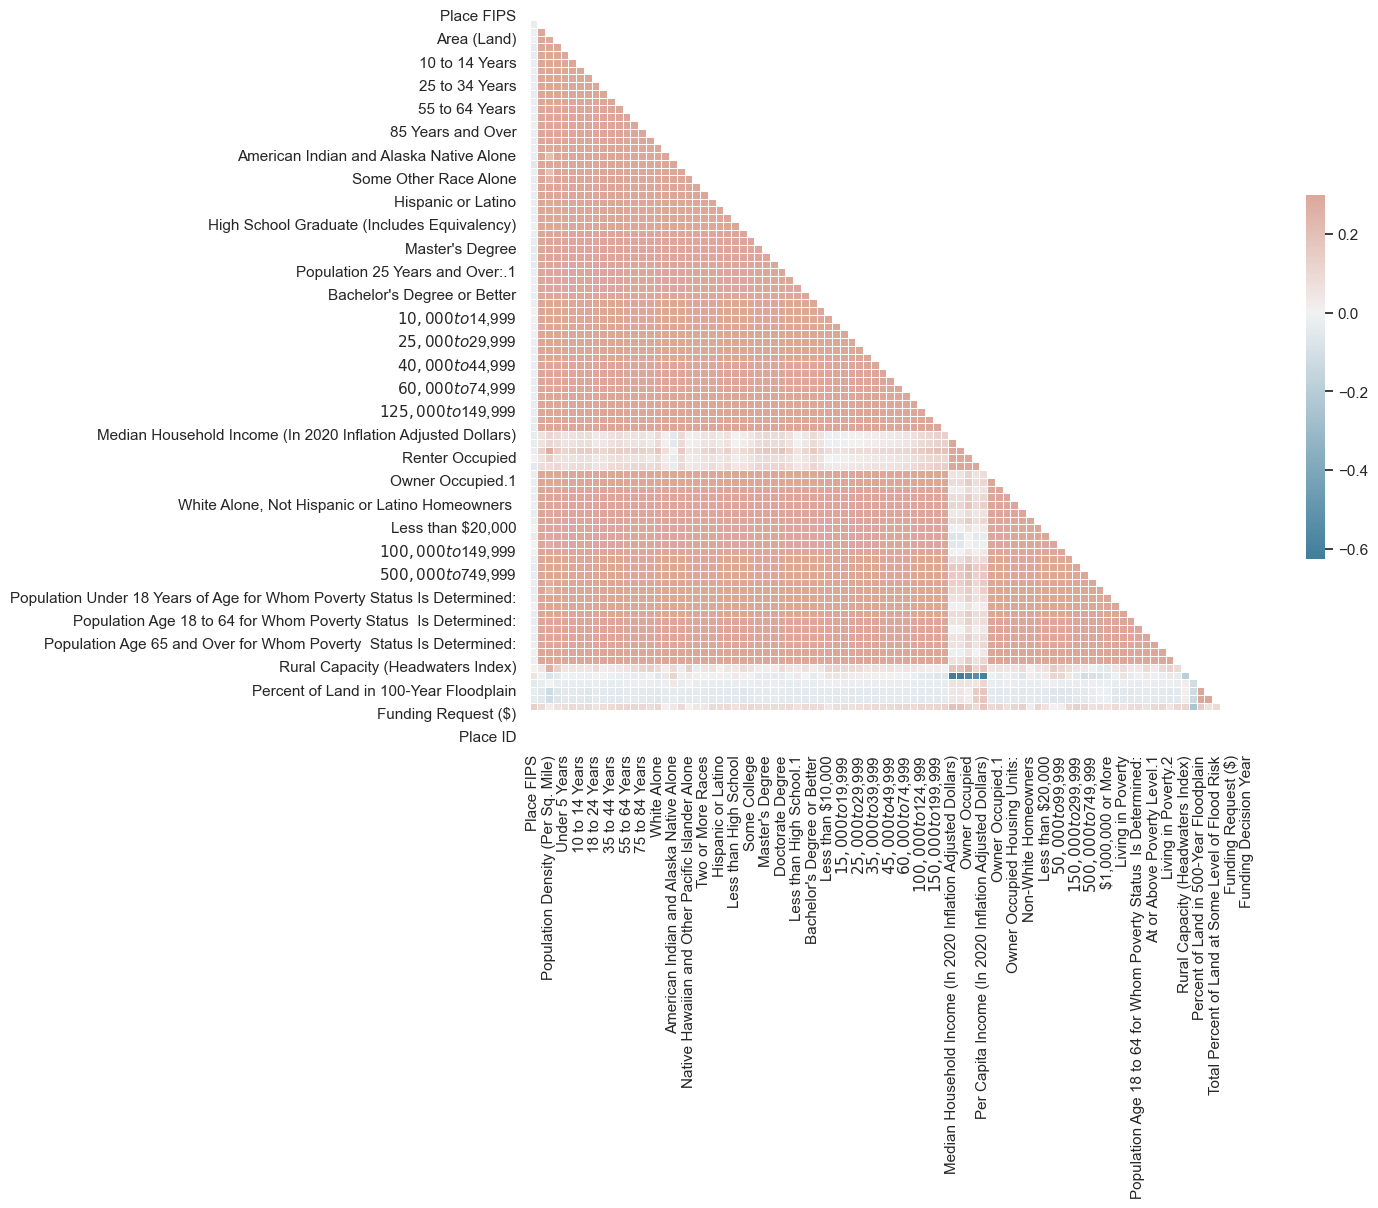

In [66]:
sns.set_theme(style="white")
from string import ascii_letters

# Compute the correlation matrix
corr = final_data_2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


We now analyze the correlations for Alexis CDP.

In [72]:
alexis_cdp = final_data_2[final_data_2["Geography Name"] == "Alexis CDP"]
# Find correlation between variables White Alone, Not Hispanic or Latino, and Total Percent of Land at Some Level of Flood Risk
alexis_cdp_corr = alexis_cdp['White Alone'].corr(alexis_cdp['Total Percent of Land at Some Level of Flood Risk'])
print(alexis_cdp_corr)

nan


In [74]:
# Find correlation between variables Black or African American Alone, Not Hispanic or Latino, and Total Percent of Land at Some Level of Flood Risk
alexis_cdp

,Geography Name,County FIPS,County Name,Place FIPS,Total Population,Population Density (Per Sq. Mile),Area (Land),Under 5 Years,5 to 9 Years,10 to 14 Years,...,State Agency Requested for Funding,Funding Request ($),Total Project Budget ($),Funding Decision Year,Award Date,Grant Award ($),Encumbered ($),City/Town,County,Place ID
5,Alexis CDP,71,Gaston,3700880.0,818.0,414.1,1.98,28.0,56.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


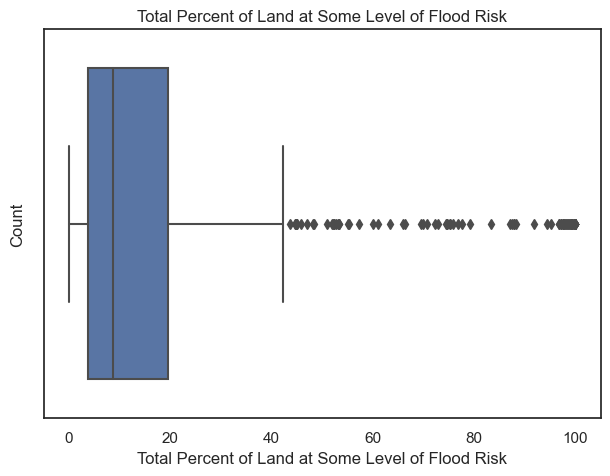

In [79]:
# Box and whisker plot of Total Percent of Land at Some Level of Flood Risk
sns.boxplot(x=final_data_2["Total Percent of Land at Some Level of Flood Risk"])
plt.title("Total Percent of Land at Some Level of Flood Risk")
plt.xlabel("Total Percent of Land at Some Level of Flood Risk")
plt.ylabel("Count")
plt.show()

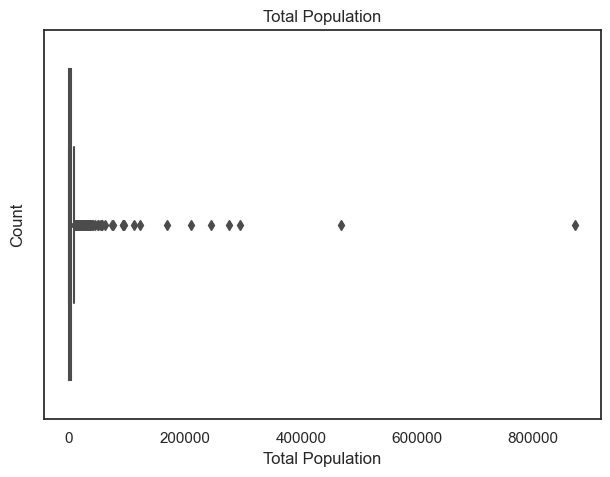

In [80]:
# Box and whisker plot of Total Population
sns.boxplot(x=final_data_2["Total Population"])
plt.title("Total Population")
plt.xlabel("Total Population")
plt.ylabel("Count")
plt.show()